# Problem Statement and Brief Summary

The project aims to help doctor to predict breast cancer given the biopsied breast cells
- Given the information about the breast cells of a new patient, the doctor can consult the prediction to decide whether the patient need further examination

# Data Ingestion and EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv('d:/git/Data-Challenges/Breast Cancer Detection/Copy of breast-cancer-wisconsin.txt', index_col='Index')
df.tail()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
15850,1169049,7,3,4,4,3,3,3,2,7,4
15851,1076352,3,6,4,10,3,3,3,4,1,4
15852,1107684,6,10,5,5,4,10,6,10,1,4
15853,1111249,10,6,6,3,4,5,3,6,1,4
15854,1106829,7,8,7,2,4,8,3,8,2,4


In [3]:
# Checking the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15855 entries, 0 to 15854
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           15855 non-null  int64 
 1   Clump Thickness              15855 non-null  int64 
 2   Uniformity of Cell Size      15827 non-null  object
 3   Uniformity of Cell Shape     15827 non-null  object
 4   Marginal Adhesion            15827 non-null  object
 5   Single Epithelial Cell Size  15827 non-null  object
 6   Bare Nuclei                  15827 non-null  object
 7   Bland Chromatin              15827 non-null  object
 8   Normal Nucleoli              15827 non-null  object
 9   Mitoses                      15827 non-null  object
 10  Class                        15827 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


In [4]:
# There are many columns with object type, let coerce non-numeric to NA
df = df.apply(lambda x: pd.to_numeric(x,errors='coerce') if x.dtype=='object' else x)

In [5]:
# Checking the distribution of classification
df.Class.value_counts(dropna=False)

4.0     15164
2.0       456
40.0      151
NaN        79
20.0        5
Name: Class, dtype: int64

There are two types of class which are '4' and '2'. It seems like many values encoded wrongly as 40 and 20. Let correct these classes

In [6]:
# Replace 4 and 2 where class is 40 or 20
df.loc[df['Class']==40, 'Class'] = 4
df.loc[df['Class']==20, 'Class'] = 2

In [7]:
# And replace class where 4=1 and 2=0 to indicate a detection of breast cancer
df.loc[df['Class']==4, 'Class'] = 1
df.loc[df['Class']==2, 'Class'] = 0

In [8]:
# Regarding 79 cases of NA in classification which we don't know the true class, it is not reasonable to impute these missing
# Let drop missing classes
df.dropna(subset=['Class'], inplace=True)
df.shape

(15776, 11)

In [9]:
# The column ID will not help to predict cancer, let drop it
df.drop('ID', inplace=True, axis=1)

In [10]:
# Next, let see the summary statistics of the data
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,15776.000000,15776.000000,15776.000000,15776.000000,15776.000000,15760.000000,15776.000000,15776.000000,15776.000000,15776.000000
mean,8.257987,7.475849,6.091405,5.489351,4.597807,7.004822,5.019397,5.406440,1.829361,0.970778
std,7.374578,6.800880,5.523121,6.109255,4.832097,7.058168,4.856222,5.874417,2.857843,0.168432
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
50%,8.000000,6.000000,5.000000,4.000000,4.000000,8.000000,4.000000,5.000000,1.000000,1.000000
75%,10.000000,10.000000,7.000000,7.000000,4.000000,10.000000,7.000000,8.000000,2.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,70.000000,100.000000,70.000000,1.000000


In [11]:
# Since the data can only take a value from 1 to 10, any value larger than 10 is error.
# Assuming the error is random then we can drop these error rows rather than imputing them
df = df[df['Clump Thickness']<=10] 

In [12]:
df = df[df['Uniformity of Cell Size']<=10]

In [13]:
# Checking how many NAs left in the data
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
# Let fill those NAs with Bare Nuclei mean
df['Bare Nuclei'].fillna(round(df['Bare Nuclei'].mean(),0), inplace=True)

In [15]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

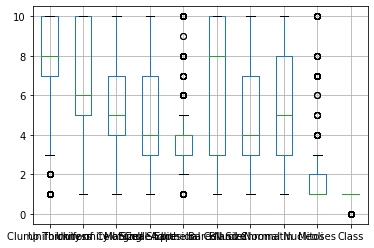

In [16]:
# Let visulaize the distributio of the final dataset
df.boxplot()

# Feature Engineer

In [17]:
# Let see is there any significant correlation among columns
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.057426,0.114786,-0.359549,0.121242,0.164791,0.078632,-0.089737,-0.097281,0.370024
Uniformity of Cell Size,0.057426,1.000000,0.661121,-0.014914,0.074590,0.308438,0.305737,0.672217,-0.254183,0.390752
Uniformity of Cell Shape,0.114786,0.661121,1.000000,-0.189337,0.044897,0.313141,0.133274,0.376572,-0.112124,0.339598
Marginal Adhesion,-0.359549,-0.014914,-0.189337,1.000000,0.529113,-0.113695,0.078214,-0.124907,-0.054858,0.218200
Single Epithelial Cell Size,0.121242,0.074590,0.044897,0.529113,1.000000,-0.217398,0.199736,-0.008260,-0.127894,0.173577
Bare Nuclei,0.164791,0.308438,0.313141,-0.113695,-0.217398,1.000000,0.246228,-0.054177,-0.176605,0.267919
Bland Chromatin,0.078632,0.305737,0.133274,0.078214,0.199736,0.246228,1.000000,0.078509,-0.170057,0.229693
Normal Nucleoli,-0.089737,0.672217,0.376572,-0.124907,-0.008260,-0.054177,0.078509,1.000000,-0.195558,0.226330
Mitoses,-0.097281,-0.254183,-0.112124,-0.054858,-0.127894,-0.176605,-0.170057,-0.195558,1.000000,0.069248
Class,0.370024,0.390752,0.339598,0.218200,0.173577,0.267919,0.229693,0.226330,0.069248,1.000000


All of the coef of correlation are low, hence correlation between features is not a problem for this dataset

In [18]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000
mean,7.583099,6.892382,5.622151,5.030090,4.219270,6.466197,4.613060,4.970038,1.663252,0.970807
std,2.168477,2.470028,2.132975,2.911876,2.096708,3.220150,1.896674,2.818404,1.501705,0.168354
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
50%,8.000000,6.000000,5.000000,4.000000,4.000000,8.000000,4.000000,5.000000,1.000000,1.000000
75%,10.000000,10.000000,7.000000,7.000000,4.000000,10.000000,7.000000,8.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Since all the features' value are between 1 and 10, we don't need to scale the data and can proceed directly to model and optimization

# Model Selection and Optimization

In [19]:
# Splitting the dataset into features and target
X = df.iloc[:, 0:9].values
y = df.iloc[:, -1].values

In [20]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [21]:
# Create the collection of models we are going to use
def models(X_train,y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression()
  log.fit(X_train, y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear')
  svc_lin.fit(X_train, y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf')
  svc_rbf.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
  forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
  return log, knn, svc_lin, svc_rbf, forest

In [22]:
# Fit and report the accuracy of the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.998719590268886
[1]K Nearest Neighbor Training Accuracy: 0.9992317541613316
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9986342296201451
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.998804950917627
[4]Random Forest Classifier Training Accuracy: 0.9996585574050363


In [23]:
# Another detail look of the performance of these models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classifiers = ['Logistic Regression', 'K Nearest Neighbor', 'Linear SVC', 'SVC', 'Random Forest']

for i, j in zip(range(len(model)), classifiers):
  print('Model ', j)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  Logistic Regression
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       114
         1.0       1.00      1.00      1.00      3791

    accuracy                           1.00      3905
   macro avg       0.99      0.98      0.98      3905
weighted avg       1.00      1.00      1.00      3905

0.9982074263764404

Model  K Nearest Neighbor
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       114
         1.0       1.00      1.00      1.00      3791

    accuracy                           1.00      3905
   macro avg       0.99      0.98      0.99      3905
weighted avg       1.00      1.00      1.00      3905

0.9984635083226633

Model  Linear SVC
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       114
         1.0       1.00      1.00      1.00      3791

    accuracy                           1.00      3905
   macro avg     

We can see that all of the models perform really well on this dataset, we will go with logistic regression for futher interpretation of the model

## Logistic regression and feature selection

In [24]:
from sklearn.linear_model import LogisticRegression

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
from sklearn.model_selection import GridSearchCV

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C': [0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'C': 1}


In [27]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features: ", np.count_nonzero(coefs))

Total number of features: 9
Number of selected features:  9


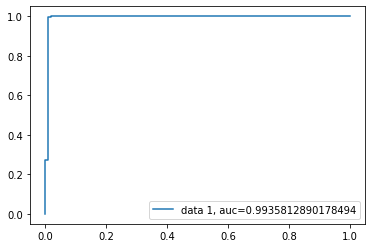

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred_proba = searcher.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
df1 = pd.DataFrame( df.columns[0:9].to_list(), coefs.tolist())

In [30]:
df1 = df1.reset_index().sort_values(by='level_0', ascending=False)

In [31]:
df1.columns = ['Values', 'Features']
df1

,Values,Features
8,0.826425,Mitoses
1,0.822506,Uniformity of Cell Size
3,0.659015,Marginal Adhesion
0,0.649729,Clump Thickness
5,0.458915,Bare Nuclei
2,0.227912,Uniformity of Cell Shape
6,0.147055,Bland Chromatin
7,0.074080,Normal Nucleoli
4,-0.145690,Single Epithelial Cell Size


In [33]:
from sklearn.feature_selection import RFE

# Feature selection with Logistic Regression
for i in range(9):
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=(i+1))
    rfe.fit(X_train, y_train)
    print(df.iloc[:, 0:9].columns[rfe.support_])
    print(accuracy_score(y_test, rfe.predict(X_test)))

Index(['Uniformity of Cell Size'], dtype='object')
0.9948783610755442
Index(['Uniformity of Cell Size', 'Mitoses'], dtype='object')
0.9948783610755442
Index(['Clump Thickness', 'Uniformity of Cell Size', 'Mitoses'], dtype='object')
0.9964148527528809
Index(['Clump Thickness', 'Uniformity of Cell Size', 'Marginal Adhesion',
       'Mitoses'],
      dtype='object')
0.9976952624839949
Index(['Clump Thickness', 'Uniformity of Cell Size', 'Marginal Adhesion',
       'Bare Nuclei', 'Mitoses'],
      dtype='object')
0.9982074263764404
Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei',
       'Mitoses'],
      dtype='object')
0.9982074263764404
Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')
0.9984635083226633
Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell

# Summary

From the above accucary report, the LR able to predict 100% accurately a patient who has breast cancer or not. The doctor can use LR model to predict the probability of a patient who has breast cancer or not with great confidence.

Mitoses is the features of a cell that is the largest drivers of malignancy, however Clump Thickness, Uniformity of Cell Size and Marginal Adhesion are also important

If we are limitted by time and money, the collectin of just 7 cell features: 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei',
       'Bland Chromatin', 'Mitoses' will give us the highest accuracy 

Or with a tiny forego of accuracy from 0.998 to 0.994, we can just use 2 cell features 'Uniformity of Cell Size' and 'Mitoses'